In [1]:
import sys
sys.path.append('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/Codes/') 

%load_ext autoreload  
%autoreload 2      


from psutil import *

In [2]:
import cv2
import numpy as np

def find_white_sphere(image):
    # Apply a Gaussian blur to the image to reduce noise
    blurred = cv2.GaussianBlur(image, (9, 9), 2)
    
    # Use HoughCircles to detect circles in the image
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=0, maxRadius=0)
    
    if circles is not None:
        # Convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        
        # Assuming the first detected circle is the white sphere
        x, y, r = circles[0]
        return (x, y), r
    else:
        return None, None

# Example usage:
# image = cv2.imread('path_to_image', cv2.IMREAD_GRAYSCALE)
# center, radius = find_white_sphere(image)
# print(f"Center: {center}, Radius: {radius}")

In [155]:
# Load the image

PATH_IMG  = '/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_00.png'

image = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)

In [12]:
# Load the image

PATH_IMG  = '/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex14_muff/light_00.png'

image = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)

In [13]:
center, r  = find_white_sphere(image)
center

(128, 127)

In [14]:
import matplotlib.pyplot as plt

def plot_circle(image, center, radius):
    # Create a copy of the image to draw the circle on
    output_image = image.copy()
    
    # Draw the circle
    cv2.circle(output_image, center, radius, (255, 0, 0), 2)
    
    # Draw the center of the circle
    cv2.circle(output_image, center, 2, (0, 255, 0), 3)
    
    # Display the image with the circle
    plt.imshow(output_image, cmap='gray')
    plt.title('Detected Circle')
    plt.show()



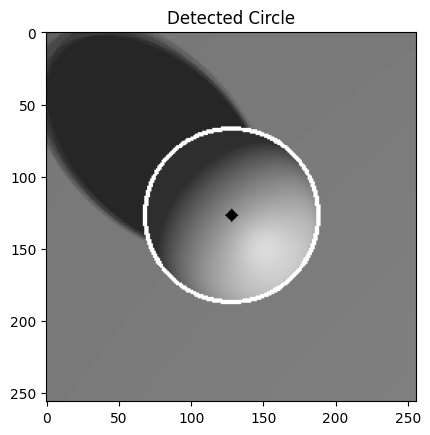

In [15]:

# Example usage:
plot_circle(image, center, r)

In [16]:
def criar_mascara_circulo_com_parametros(centro, raio, tamanho_imagem):
    """
    Esta função cria uma máscara binária com um círculo branco baseado no centro e raio fornecidos.
    
    Parâmetros:
    centro (tuple): As coordenadas (x, y) do centro do círculo.
    raio (int): O raio do círculo.
    tamanho_imagem (tuple): O tamanho da imagem (altura, largura).
    
    Retorna:
    numpy.ndarray: A máscara binária com o círculo branco.
    """
    # Criar uma máscara vazia
    mascara = np.zeros(tamanho_imagem, dtype=np.uint8)
    
    # Desenhar o círculo na máscara
    cv2.circle(mascara, centro, raio, 255 , thickness=cv2.FILLED)
    
    return mascara

True

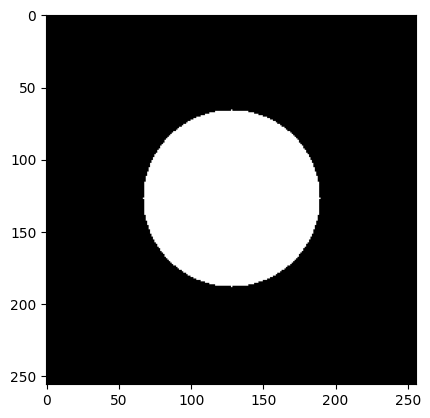

In [19]:
mascara = criar_mascara_circulo_com_parametros(center, r+1, image.shape)
plt.imshow(mascara, cmap='gray')

cv2.imwrite('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex14_muff/mascara.png', mascara)

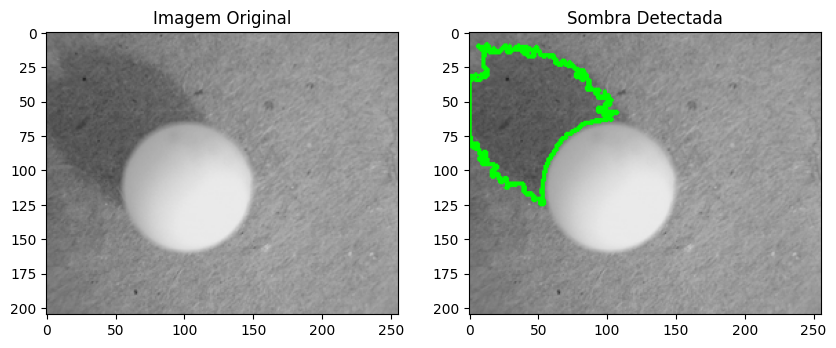

Centro da esfera: (102, 111)
Ponto estimado da luz: (6, 10)
Direção da luz: (-96, -101)


In [80]:
import cv2
import numpy as np

def estimate_light_source(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar um filtro para suavizar ruídos
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Detectar bordas usando Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Encontrar contornos
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Identificar o maior contorno como a esfera
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    sphere_contour = contours[0]  # Supondo que a esfera é o maior objeto
    
    # Obter as informações do círculo (esfera)
    (x_sphere, y_sphere), radius = cv2.minEnclosingCircle(sphere_contour)
    center_sphere = (int(x_sphere), int(y_sphere))
    radius = int(radius)
    
    # Identificar o segundo maior contorno como a sombra
    shadow_contour = contours[1]  # Supondo que a sombra é o segundo maior contorno
    shadow_contour = detect_shadow(image_path)
    
    # Encontrar o ponto mais distante do centro da esfera no contorno da sombra
    max_distance = 0
    light_point = None
    for point in shadow_contour:
        px, py = point[0]
        distance = np.sqrt((px - x_sphere)**2 + (py - y_sphere)**2)
        if distance > max_distance:
            max_distance = distance
            light_point = (px, py)
    
    # Calcular a direção da luz (vetor da esfera para a luz)
    direction = (light_point[0] - center_sphere[0], light_point[1] - center_sphere[1])
    
    # Exibir resultados
    result_image = image.copy()
    cv2.circle(result_image, center_sphere, radius, (0, 255, 0), 2)  # Esfera
    cv2.circle(result_image, light_point, 5, (0, 0, 255), -1)  # Ponto de luz
    cv2.arrowedLine(result_image, center_sphere, light_point, (255, 0, 0), 2)  # Direção da luz
    
    # Salvar e mostrar a imagem resultante
    cv2.imshow("Result", result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return center_sphere, light_point, direction

# Caminho para a imagem da esfera
image_path = "esfera_com_sombra.jpg"
center, light_point, direction = estimate_light_source(PATH_IMG)

print(f"Centro da esfera: {center}")
print(f"Ponto estimado da luz: {light_point}")
print(f"Direção da luz: {direction}")


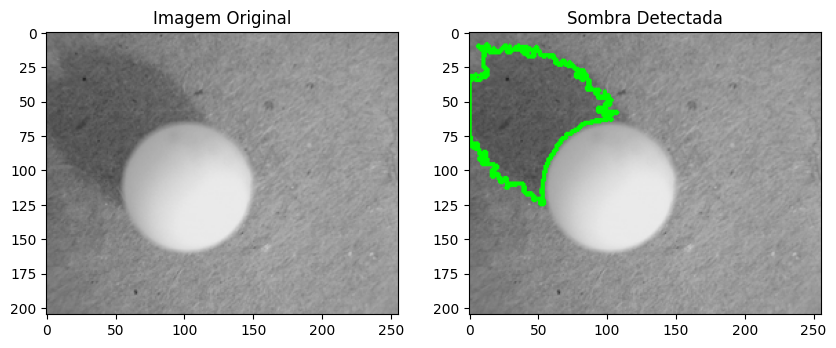

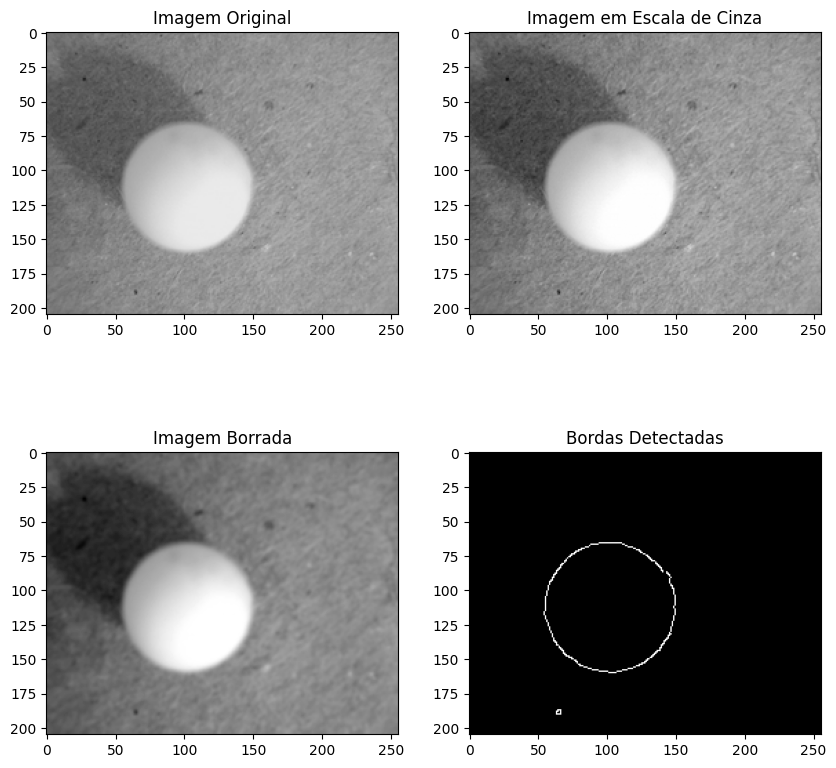

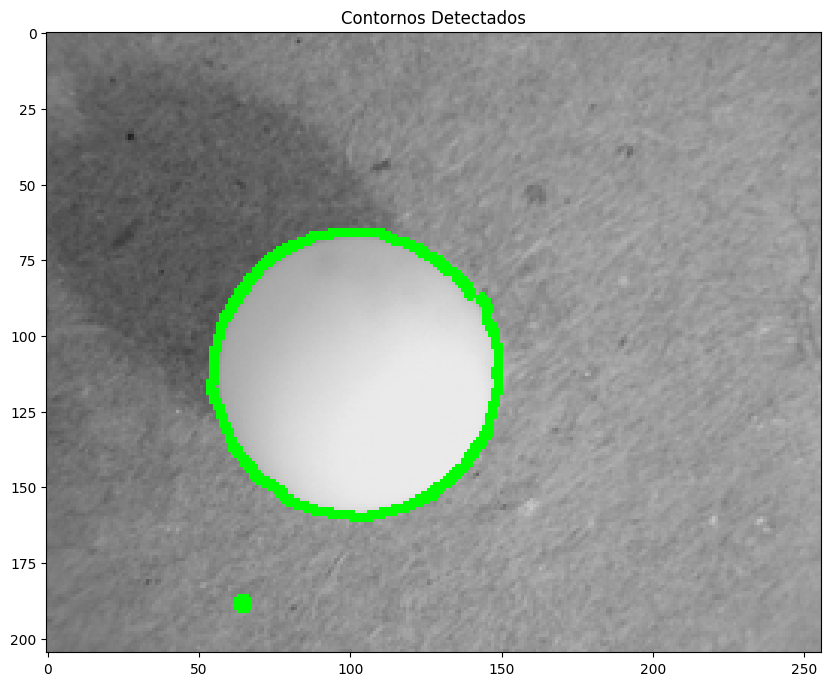

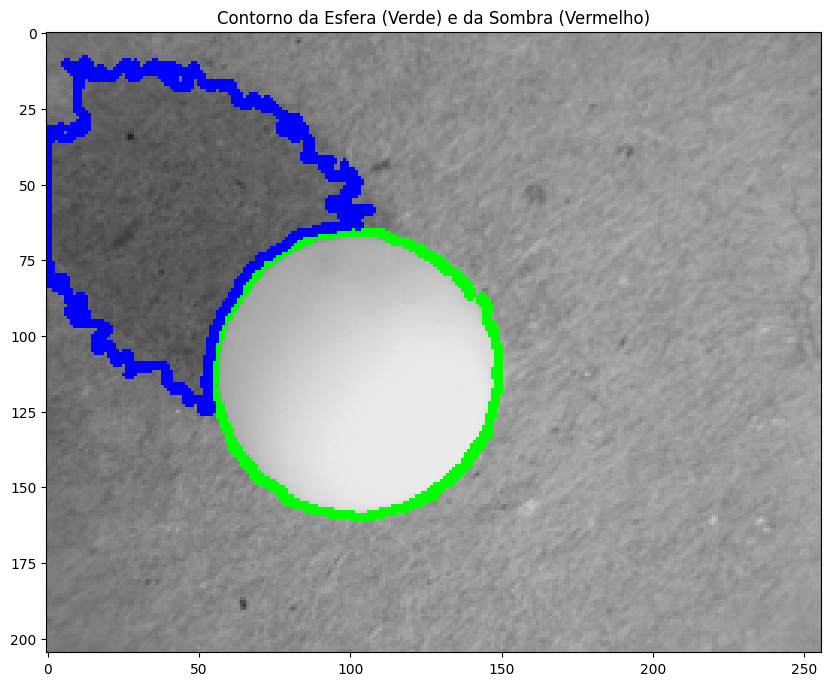

Centro da Esfera: (102, 111)
Raio da Esfera: 48
Ponto de Luz Estimado: None
Direção da Luz: None


In [76]:
image = cv2.imread(PATH_IMG, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Aplicar um filtro para suavizar ruídos
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
# Detectar bordas usando Canny
edges = cv2.Canny(blurred, 50, 150)
    
# Encontrar contornos
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
# Identificar o maior contorno como a esfera
contours = sorted(contours, key=cv2.contourArea, reverse=True)
sphere_contour = contours[0]  # Supondo que a esfera é o maior objeto
    
# Obter as informações do círculo (esfera)
(x_sphere, y_sphere), radius = cv2.minEnclosingCircle(sphere_contour)
center_sphere = (int(x_sphere), int(y_sphere))
radius = int(radius)
    
# Identificar o segundo maior contorno como a sombra
shadow_contour = contours[1]  # Supondo que a sombra é o segundo maior contorno
shadow_contour = detect_shadow(PATH_IMG)
# Mostrar a imagem original
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

# Mostrar a imagem em escala de cinza
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Imagem em Escala de Cinza')

# Mostrar a imagem borrada
plt.subplot(2, 2, 3)
plt.imshow(blurred, cmap='gray')
plt.title('Imagem Borrada')

# Mostrar as bordas detectadas
plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title('Bordas Detectadas')

plt.show()

# Mostrar os contornos detectados
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Contornos Detectados')
plt.show()

# Mostrar o contorno da esfera e da sombra
output_image = image.copy()
cv2.drawContours(output_image, [sphere_contour], -1, (0, 255, 0), 2)
cv2.drawContours(output_image, [shadow_contour], -1, (255, 0, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Contorno da Esfera (Verde) e da Sombra (Vermelho)')
plt.show()

# Mostrar os valores calculados
print(f"Centro da Esfera: {center_sphere}")
print(f"Raio da Esfera: {radius}")
print(f"Ponto de Luz Estimado: {light_point}")
print(f"Direção da Luz: {direction}")

In [241]:
import cv2
import numpy as np

def detect_shadows(image):
    """
    Detecta sombras em uma imagem com base em análise de intensidade e cor.
    
    Parâmetros:
        image (numpy.ndarray): Imagem de entrada no formato RGB.
        
    Retorna:
        shadow_mask (numpy.ndarray): Máscara binária onde as sombras são destacadas.
    """
    # 1. Converter a imagem de RGB para HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    v_channel = hsv_image[:, :, 2]  # Canal de luminância (V)

    # 2. Normalizar os canais de cor no espaço RGB
    normalized_rgb = image.astype(np.float32) / (np.sum(image, axis=2, keepdims=True) + 1e-5)
    
    # Criar a razão cromática (soma normalizada)
    chromatic_ratio = np.mean(normalized_rgb, axis=2)

    # 3. Detectar bordas usando o detector Canny
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    # 4. Identificar regiões de baixa luminância (possíveis sombras)
    shadow_regions = v_channel < np.percentile(v_channel, 10)  # Pixels com baixa intensidade

    # 5. Combinar as informações: bordas e regiões escuras
    shadow_mask = (shadow_regions & (chromatic_ratio < 0.5)).astype(np.uint8)

    # 6. Melhorar a máscara usando operações morfológicas
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
    shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
    shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
    
    return shadow_mask




In [243]:
input_image = cv2.imread("/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/image_02.png")

shadow_mask = detect_shadows(input_image)
    
# Exibir resultados
cv2.imshow("Original Image", input_image)
cv2.imshow("Shadow Mask", shadow_mask * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()


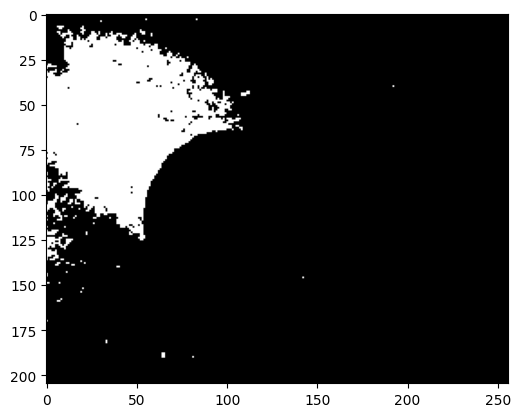

In [222]:
# Aplicar um limiar para separar objetos escuros (sombra) do fundo
_, binary = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')

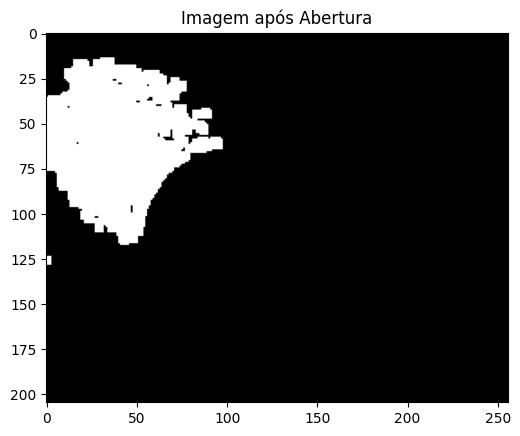

In [223]:
def aplicar_abertura(imagem_binaria, kernel_tamanho=(5, 5)):
    """
    Aplica a operação de abertura em uma imagem binária.

    Parâmetros:
    imagem_binaria (numpy.ndarray): A imagem binária na qual aplicar a abertura.
    kernel_tamanho (tuple): O tamanho do kernel para a operação de abertura. Padrão é (5, 5).

    Retorna:
    numpy.ndarray: A imagem resultante após a aplicação da abertura.
    """
    # Criar o kernel para a operação de abertura
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_tamanho)
    
    # Aplicar a abertura
    imagem_aberta = cv2.morphologyEx(imagem_binaria, cv2.MORPH_OPEN, kernel)
    
    return imagem_aberta

# Exemplo de uso:
imagem_aberta = aplicar_abertura(binary)
plt.imshow(imagem_aberta, cmap='gray')
plt.title('Imagem após Abertura')
plt.show()

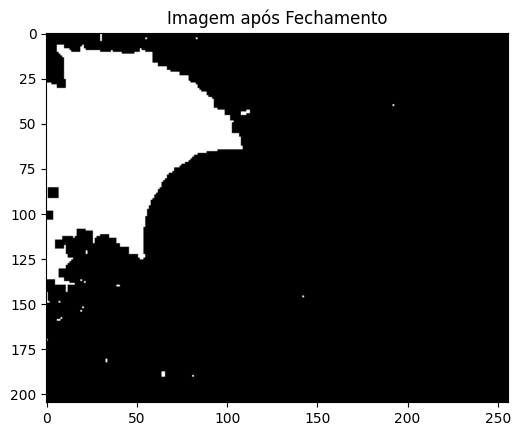

In [224]:
def aplicar_fechamento(imagem_binaria, kernel_tamanho=(5, 5)):
    """
    Aplica o fechamento em uma imagem binária.

    Parâmetros:
    imagem_binaria (numpy.ndarray): A imagem binária na qual aplicar o fechamento.
    kernel_tamanho (tuple): O tamanho do kernel para a operação de fechamento. Padrão é (5, 5).

    Retorna:
    numpy.ndarray: A imagem resultante após a aplicação do fechamento.
    """
    # Criar o kernel para a operação de fechamento
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_tamanho)
    
    # Aplicar o fechamento
    imagem_fechada = cv2.morphologyEx(imagem_binaria, cv2.MORPH_CLOSE, kernel)
    
    return imagem_fechada

# Exemplo de uso:
imagem_fechada = aplicar_fechamento(binary)
plt.imshow(imagem_fechada, cmap='gray')
plt.title('Imagem após Fechamento')
plt.show()

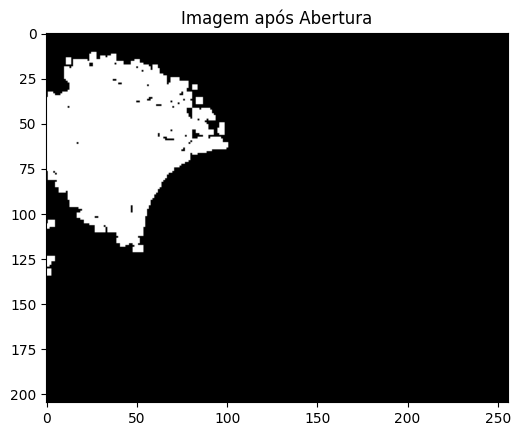

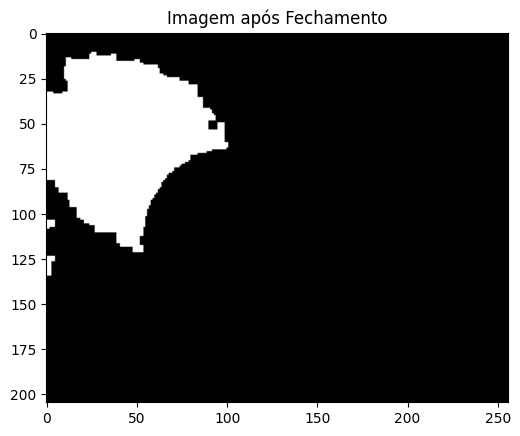

In [225]:
imagem_aberta = aplicar_abertura(binary, kernel_tamanho=(3, 3))
img_resultado = aplicar_fechamento(imagem_aberta, kernel_tamanho=(5, 5))


plt.imshow(imagem_aberta, cmap='gray')
plt.title('Imagem após Abertura')
plt.show()

plt.imshow(img_resultado, cmap='gray')
plt.title('Imagem após Fechamento')
plt.show()

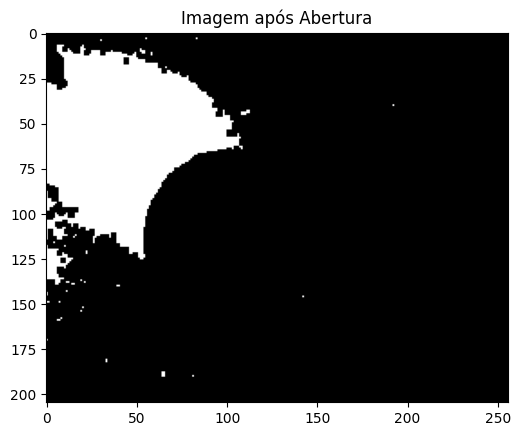

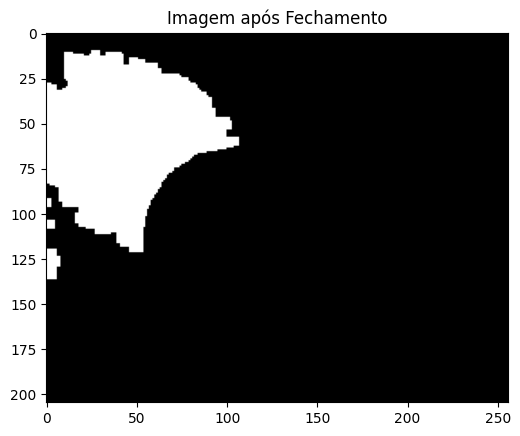

In [257]:
img_fechada = aplicar_fechamento(binary, kernel_tamanho=(3, 3))
img_resultado = aplicar_abertura(img_fechada, kernel_tamanho=(5, 5))



plt.imshow(img_fechada, cmap='gray')
plt.title('Imagem após Abertura')
plt.show()

plt.imshow(img_resultado, cmap='gray')
plt.title('Imagem após Fechamento')
plt.show()

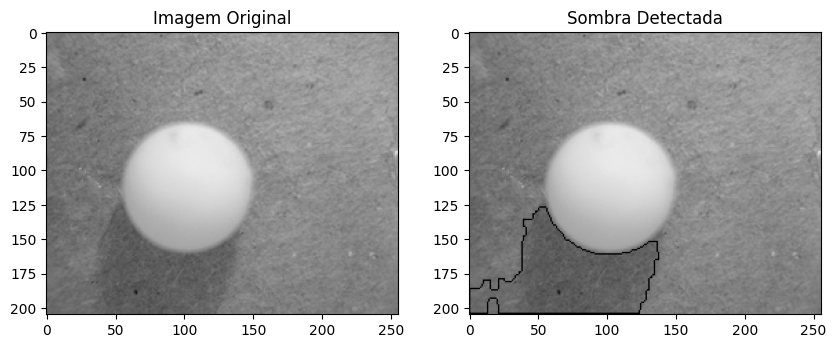

In [261]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

def detect_shadow(image):
    # Carregar a imagem
    #image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar um limiar para separar objetos escuros (sombra) do fundo
    _, binary = cv2.threshold(image, 105, 150, cv2.THRESH_BINARY_INV)


    img_fechada = aplicar_fechamento(binary, kernel_tamanho=(5, 5))
    binary = aplicar_abertura(img_fechada, kernel_tamanho=(5, 5))
    
    # Encontrar contornos
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Identificar o maior contorno (a sombra)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    shadow_contour = contours[0]  # Supondo que a sombra é o maior objeto
    
    # Desenhar o contorno da sombra na imagem original
    output_image = image.copy()
    cv2.drawContours(output_image, [shadow_contour], -1, (0, 255, 0), 1)
    
    # Mostrar a imagem original e a imagem com o contorno da sombra
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('Sombra Detectada')
    
    plt.show()
    
    return shadow_contour

# Caminho para a imagem
image_path = PATH_IMG
shadow_contour = detect_shadow(image)

In [116]:
import cv2
import numpy as np

def find_shadow_center(shadow_contour):
    # Calcular o momento do contorno
    M = cv2.moments(shadow_contour)
    
    # Calcular as coordenadas do centroide
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    return (cX, cY)

# Exemplo de uso:
shadow_center = find_shadow_center(shadow_contour)
print(f"Centro da sombra: {shadow_center}")

Centro da sombra: (42, 59)


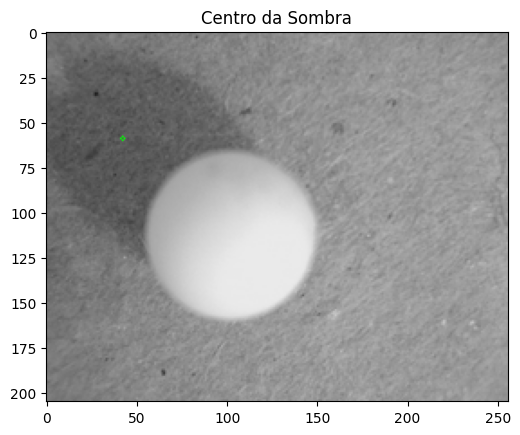

In [119]:
# Criar uma cópia da imagem para desenhar o centro da sombra
output_image = image.copy()

# Desenhar o centro da sombra na imagem
cv2.circle(output_image, shadow_center, 1, (0, 255, 0), 1)  # Desenhar um círculo verde no centro da sombra

# Exibir a imagem com o centro da sombra
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Centro da Sombra')
plt.show()

In [150]:
def calcular_equacao_reta(ponto1, ponto2):
    x1, y1 = ponto1
    x2, y2 = ponto2
    
    # Calcular a inclinação (m)
    m = (y2 - y1) / (x2 - x1)
    
    # Calcular o intercepto (b)
    b = y1 - m * x1
    
    return m, b



In [ ]:
def calcular_reta_perpendicular(ponto1, ponto2):
    x1, y1 = ponto1
    x2, y2 = ponto2
    
    # Calcular a inclinação da reta original
    if x2 - x1 != 0:
        m_original = (y2 - y1) / (x2 - x1)
    else:
        m_original = float('inf')  # Reta vertical
    
    # Calcular a inclinação da reta perpendicular
    if m_original != float('inf'):
        m_perpendicular = -1 / m_original
    else:
        m_perpendicular = 0  # Reta horizontal
    
    # Calcular o intercepto (b) da reta perpendicular que passa por ponto2
    b_perpendicular = y2 - m_perpendicular * x2
    
    return m_perpendicular, b_perpendicular



A equação da reta perpendicular é: y = -1.1538461538461537x + 228.69230769230768


In [144]:
def pontos_mais_distantes_perpendiculares(contorno, m_reta, b_reta):
    max_distancia = 0
    ponto1 = None
    ponto2 = None
    
    for i in range(len(contorno)):
        for j in range(i + 1, len(contorno)):
            p1 = contorno[i][0]
            p2 = contorno[j][0]
            
            # Calcular a distância entre os pontos
            distancia = np.linalg.norm(p1 - p2)
            
            # Calcular a inclinação da reta que passa por p1 e p2
            if p2[0] - p1[0] != 0:
                m_pontos = (p2[1] - p1[1]) / (p2[0] - p1[0])
            else:
                m_pontos = float('inf')  # Reta vertical
            
            # Verificar se as retas são perpendiculares
            if m_pontos == float('inf') and m_reta == 0:
                perpendiculares = True
            elif m_pontos == 0 and m_reta == float('inf'):
                perpendiculares = True
            elif m_pontos != float('inf') and m_reta != float('inf'):
                perpendiculares = np.isclose(m_pontos * m_reta, -1)
            else:
                perpendiculares = False
            
            # Atualizar os pontos mais distantes se forem perpendiculares
            if perpendiculares and distancia > max_distancia:
                max_distancia = distancia
                ponto1 = p1
                ponto2 = p2
    
    return ponto1, ponto2



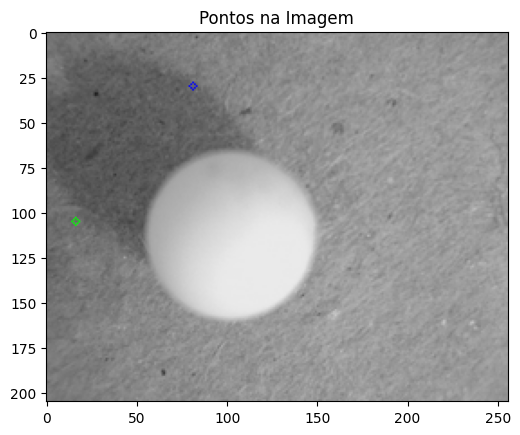

In [ ]:

ponto1, ponto2 = pontos_mais_distantes_perpendiculares(shadow_contour, m,b)
print(f"Ponto 1: {ponto1}, Ponto 2: {ponto2}")

# Criar uma cópia da imagem para desenhar os pontos
output_image_with_points = image.copy()

# Desenhar os pontos na imagem
cv2.circle(output_image_with_points, tuple(ponto1), 2, (0, 255, 0), 1)  # Desenhar um círculo verde em ponto1
cv2.circle(output_image_with_points, tuple(ponto2), 2, (255, 0, 0), 1)  # Desenhar um círculo azul em ponto2

# Exibir a imagem com os pontos
plt.imshow(cv2.cvtColor(output_image_with_points, cv2.COLOR_BGR2RGB))
plt.title('Pontos na Imagem')
plt.show()

In [191]:
def pontos_extremos_na_reta(m, b, shadow_contour):
    pontos_na_reta = []

    for point in shadow_contour:
        x, y = point[0]
        y_reta = m * x + b
        
        # Verificar se o ponto está próximo da reta
        if abs(y - y_reta) < 1:  # Tolerância de 1 pixel
            pontos_na_reta.append((x, y))
    
    if len(pontos_na_reta) < 2:
        return None, None
    
    # Encontrar os pontos extremos
    ponto1 = min(pontos_na_reta, key=lambda p: p[0])
    ponto2 = max(pontos_na_reta, key=lambda p: p[0])
    
    return ponto1, ponto2

# Exemplo de uso:
ponto1, ponto2 = pontos_extremos_na_reta(m_perpendicular, b_perpendicular, shadow_contour)
print(f"Ponto 1: {ponto1}, Ponto 2: {ponto2}")

Ponto 1: (9, 96), Ponto 2: (74, 24)


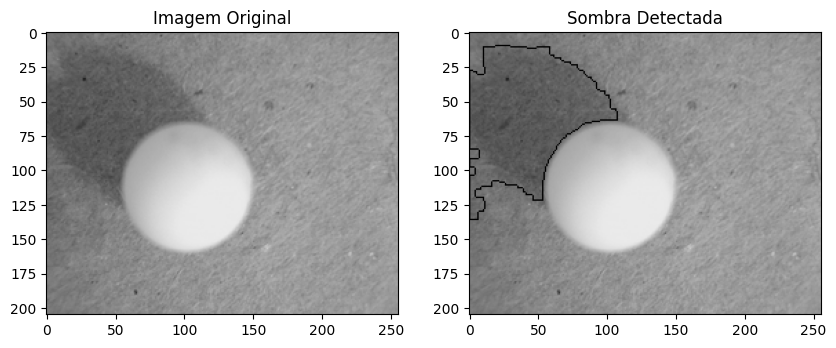

None
None


TypeError: 'NoneType' object is not iterable

In [250]:
# Load the image

PATH_IMG  = '/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_00.png'

image = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)

sphere_center, r  = find_white_sphere(image)
shadow_contour = detect_shadow(image)
shadow_center = find_shadow_center(shadow_contour)

m_perpendicular, b_perpendicular = calcular_reta_perpendicular(sphere_center, shadow_center)

ponto1_a, ponto2_a = pontos_extremos_na_reta(m_perpendicular, b_perpendicular, shadow_contour)



m, b = calcular_equacao_reta(shadow_center, sphere_center)

#essa função tá zuada
ponto1_b, ponto2_b = pontos_mais_distantes_perpendiculares(shadow_contour, m,b)









# Criar uma cópia da imagem para desenhar as variáveis
output_image_all = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)

# Desenhar o centro da esfera
cv2.circle(output_image_all, sphere_center, 5, (0, 255, 0), -1)  # Verde

# Desenhar o contorno da sombra
cv2.drawContours(output_image_all, [shadow_contour], -1, (255, 0, 0), 1)  # Vermelho

# Desenhar o centro da sombra
cv2.circle(output_image_all, shadow_center, 5, (0, 0, 255), -1)  # Azul

# Desenhar os pontos mais distantes perpendiculares
print(ponto1_a)
print(ponto2_a)
cv2.circle(output_image_all, tuple(ponto1_a), 5, (255, 255, 0), -1)  # Amarelo
cv2.circle(output_image_all, tuple(ponto2_a), 5, (255, 255, 0), -1)  # Amarelo

# Desenhar os pontos mais distantes perpendiculares
cv2.circle(output_image_all, tuple(ponto1_b), 5, (0, 255, 255), -1)  # Ciano
cv2.circle(output_image_all, tuple(ponto2_b), 5, (0, 255, 255), -1)  # Ciano

# Desenhar a reta perpendicular
height, width = image.shape[:2]
x_start = 0
y_start = int(b_perpendicular)
x_end = width
y_end = int(m_perpendicular * x_end + b_perpendicular)
cv2.line(output_image_all, (x_start, y_start), (x_end, y_end), (255, 0, 255), 2)  # Magenta

# Desenhar a reta entre o centro da esfera e o centro da sombra
cv2.line(output_image_all, sphere_center, shadow_center, (0, 255, 255), 2)  # Ciano

# Exibir a imagem com todas as variáveis desenhadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image_all, cv2.COLOR_BGR2RGB))
plt.title('Variáveis Desenhadas na Imagem')
plt.show()


0


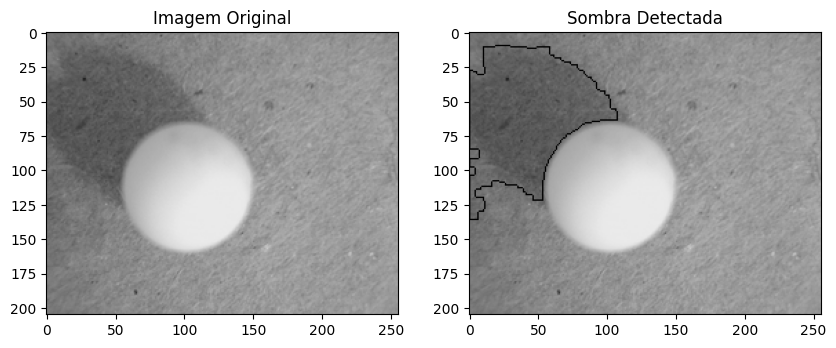

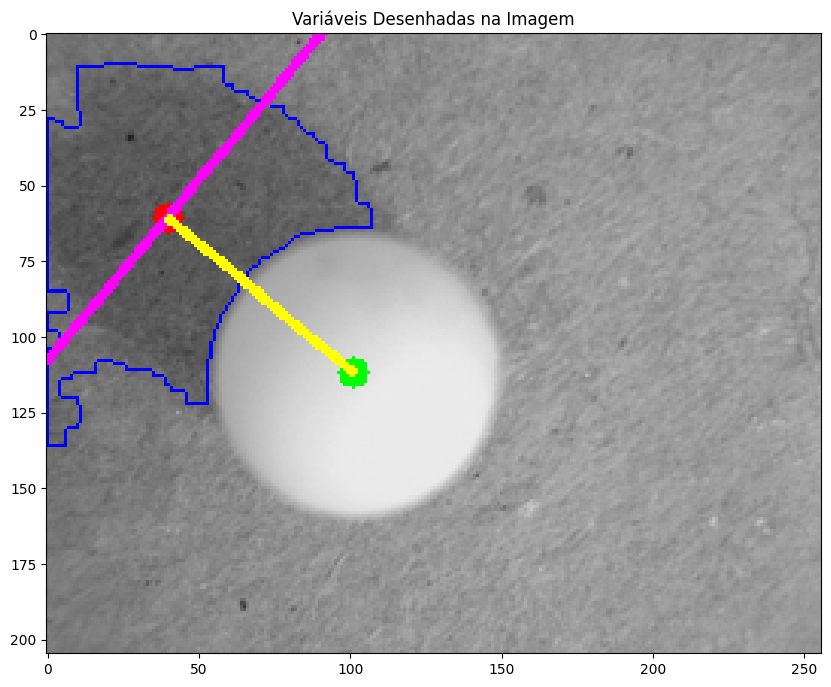

1


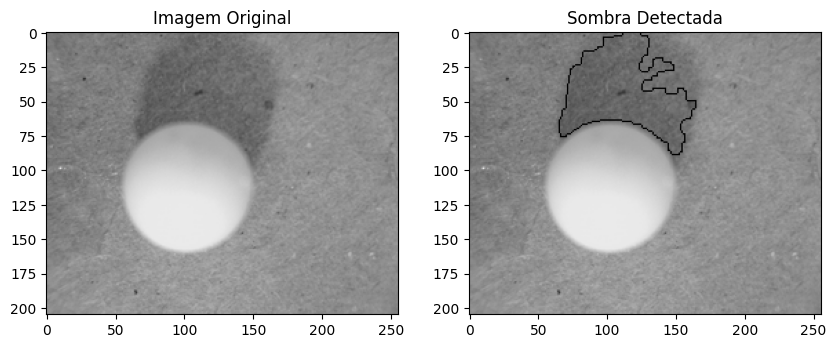

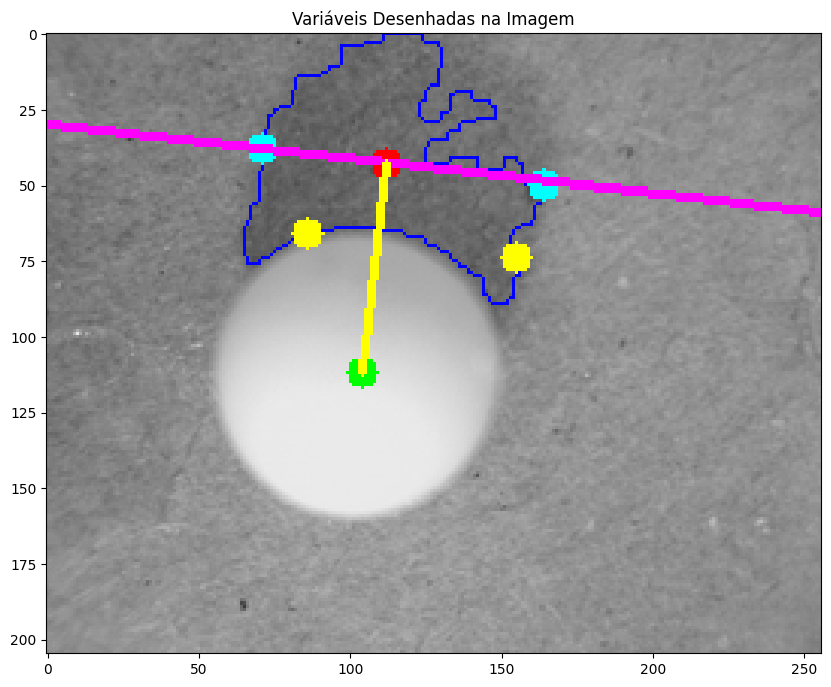

2


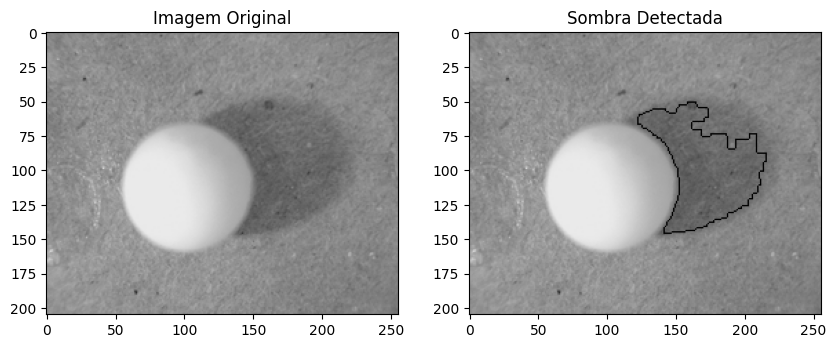

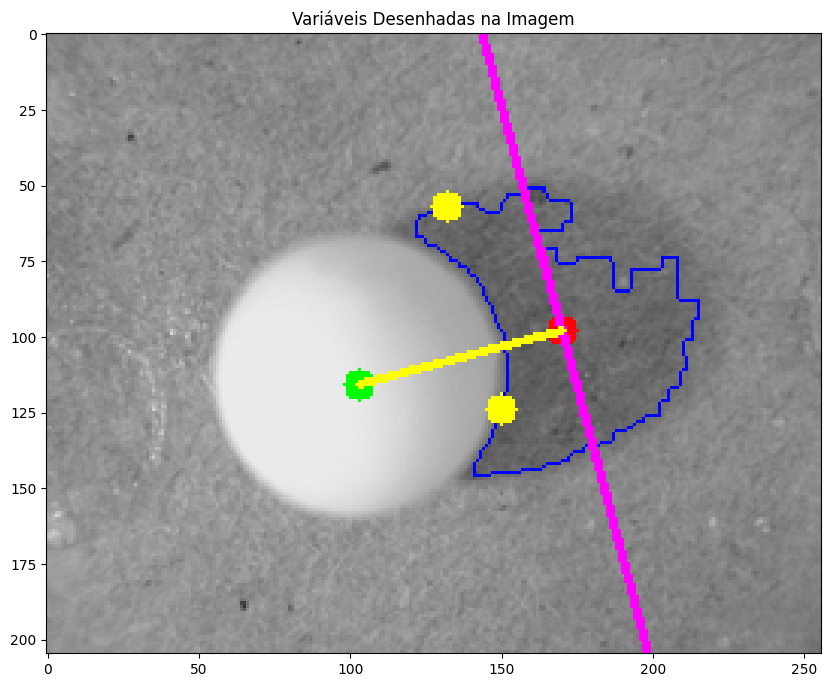

3


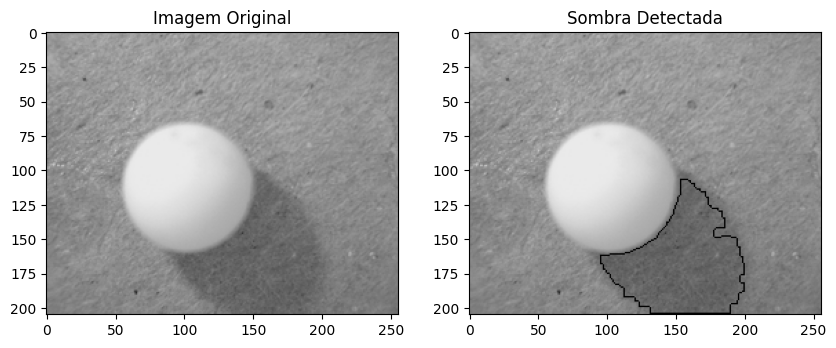

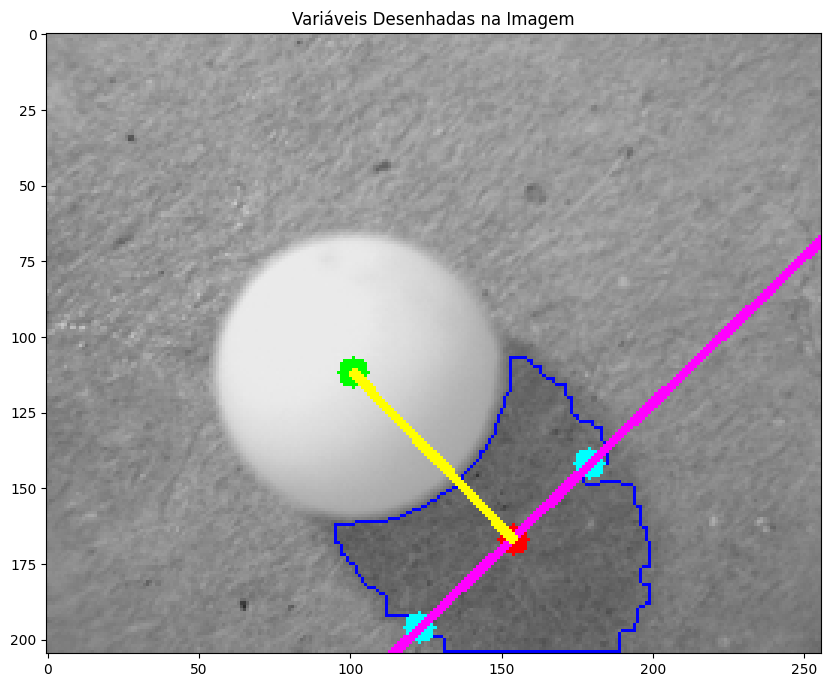

4


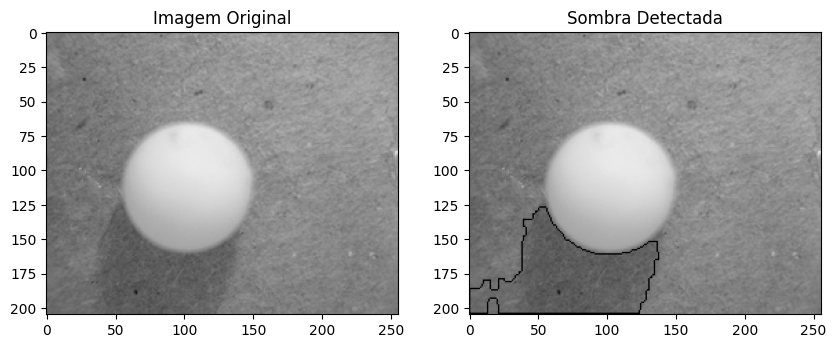

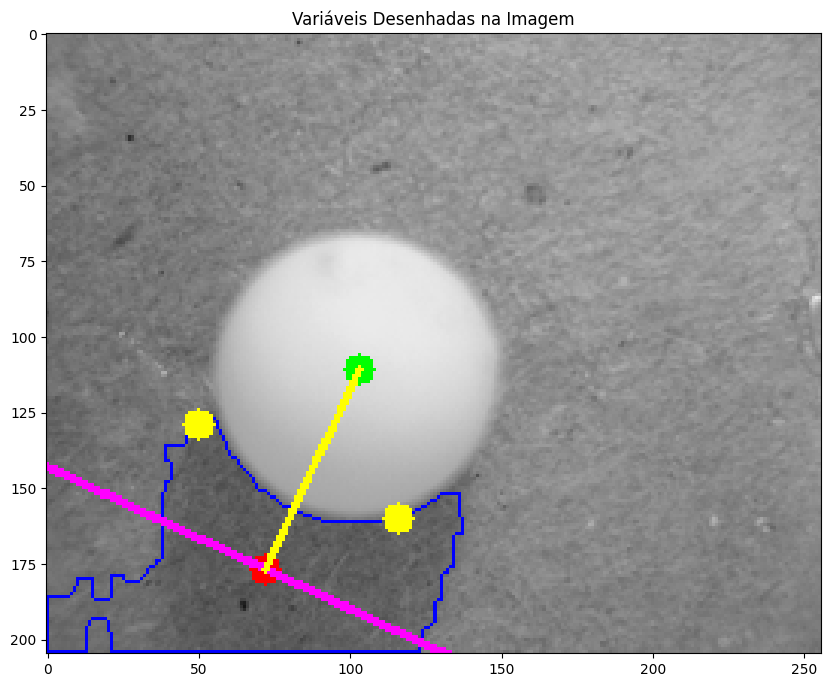

In [262]:
# Load the image



for i in range(0, 5):
    print(i)

    PATH_IMG  = f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.png'

    image = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)

    sphere_center, r  = find_white_sphere(image)
    shadow_contour = detect_shadow(image)
    shadow_center = find_shadow_center(shadow_contour)

    m_perpendicular, b_perpendicular = calcular_reta_perpendicular(sphere_center, shadow_center)

    ponto1_a, ponto2_a = pontos_extremos_na_reta(m_perpendicular, b_perpendicular, shadow_contour)



    m, b = calcular_equacao_reta(shadow_center, sphere_center)

    #essa função tá zuada
    ponto1_b, ponto2_b = pontos_mais_distantes_perpendiculares(shadow_contour, m,b)









    # Criar uma cópia da imagem para desenhar as variáveis
    output_image_all = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)

    # Desenhar o centro da esfera
    cv2.circle(output_image_all, sphere_center, 5, (0, 255, 0), -1)  # Verde

    # Desenhar o contorno da sombra
    cv2.drawContours(output_image_all, [shadow_contour], -1, (255, 0, 0), 1)  # Vermelho

    # Desenhar o centro da sombra
    cv2.circle(output_image_all, shadow_center, 5, (0, 0, 255), -1)  # Azul

    if ponto1_a is not None:
        # Desenhar os pontos mais distantes perpendiculares
        cv2.circle(output_image_all, tuple(ponto1_a), 5, (255, 255, 0), -1)  # Amarelo
        cv2.circle(output_image_all, tuple(ponto2_a), 5, (255, 255, 0), -1)  # Amarelo

    if ponto1_b is not None:
        # Desenhar os pontos mais distantes perpendiculares
        cv2.circle(output_image_all, tuple(ponto1_b), 5, (0, 255, 255), -1)  # Ciano
        cv2.circle(output_image_all, tuple(ponto2_b), 5, (0, 255, 255), -1)  # Ciano

    # Desenhar a reta perpendicular
    height, width = image.shape[:2]
    x_start = 0
    y_start = int(b_perpendicular)
    x_end = width
    y_end = int(m_perpendicular * x_end + b_perpendicular)
    cv2.line(output_image_all, (x_start, y_start), (x_end, y_end), (255, 0, 255), 2)  # Magenta

    # Desenhar a reta entre o centro da esfera e o centro da sombra
    cv2.line(output_image_all, sphere_center, shadow_center, (0, 255, 255), 2)  # Ciano

    # Exibir a imagem com todas as variáveis desenhadas
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output_image_all, cv2.COLOR_BGR2RGB))
    plt.title('Variáveis Desenhadas na Imagem')
    plt.show()


In [3]:
PATH_IMG  = f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_00.png'

image = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)
image.shape

(205, 256)

In [7]:
import numpy as np
import cv2

def criar_mascara_circulo_com_parametros(centro, raio, tamanho_imagem):
    """
    Esta função cria uma máscara binária com um círculo branco baseado no centro e raio fornecidos.
    
    Parâmetros:
    centro (tuple): As coordenadas (x, y) do centro do círculo.
    raio (int): O raio do círculo.
    tamanho_imagem (tuple): O tamanho da imagem (altura, largura).
    
    Retorna:
    numpy.ndarray: A máscara binária com o círculo branco.
    """
    # Criar uma máscara vazia
    mascara = np.zeros(tamanho_imagem, dtype=np.uint8)
    
    # Desenhar o círculo na máscara
    cv2.circle(mascara, centro, raio, 255 , thickness=cv2.FILLED)
    
    return mascara



In [8]:
sphere_center, r  = find_white_sphere(image)
mascara = criar_mascara_circulo_com_parametros(sphere_center, r, image.shape)

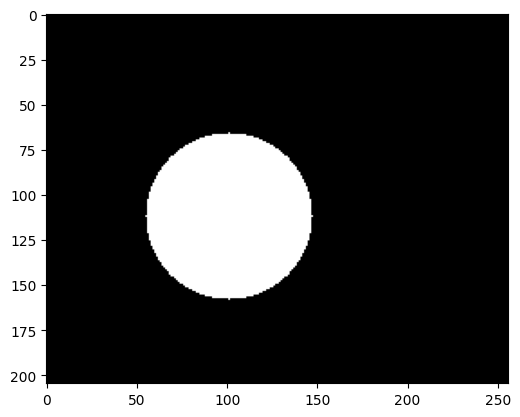

In [10]:
import matplotlib.pyplot as plt

plt.imshow(mascara, cmap='gray')

In [12]:
import numpy as np

#np.save('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muffmascara.png', mascara)
cv2.imwrite('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/mascara.png', mascara)

True